In [1]:
import tensorflow as tf

In [2]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
#MNIST Dataset
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
#Fashion MNIST Dataset
dataset, metadata = tfds.load('FashionMNIST', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHK3GVA/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHK3GVA/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
#Normalize data
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#Applying normalize() to train and test set
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
#network architecture 1 with single convolution filter
#convolution 1: Strided Convolution, one 5x5 filters, stride = 1 ('valid' means no padding)
#convolution 2: Strided Convolution, one 5x5 filters, stride = 1 ('valid' means no padding)
#maxpooling: 2x2 filter, Stride 2
#flattening (basically input layer)
#Dense Layer 1 (128 Neurons), Relu
#Dense Layer 2 (10 unit output), Softmax

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (5,5), strides = (1,1), padding='valid', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(1, (5,5), strides = (1,1), padding='valid', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#network architecture 2 with multiple convolution filters
#convolution 1: Strided Convolution, eight 5x5 filters, stride = 1 ('valid' means no padding)
#convolution 2: Strided Convolution, eight 5x5 filters, stride = 1 ('valid' means no padding)
#maxpooling: 2x2 filter, Stride 2
#flattening (basically input layer)
#Dense Layer 1 (128 Neurons), Relu
#Dense Layer 2 (10 unit output), Softmax

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5,5), strides = (1,1), padding = 'valid', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(8, (5,5), strides = (1,1), padding = 'valid', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
#network architecture 3 with multiple convolution fitlers and padding
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5,5), strides = (1,1), padding = 'same', activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(8, (5,5), strides = (1,1), padding = 'same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#Adam optimizer, learning rate = 0.01 Beta 1 = 0.95, Beta 2 = 0.99
model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.95,
    beta_2=0.99),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # I cant use CategoricalCrossentropy() because the data is loaded in mode 'int'
    metrics=['accuracy'])

In [ ]:
#model2: Adam optimizer, learning rate = 0.01 Beta 1 = 0.95, Beta 2 = 0.99
model2.compile(tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.95,
    beta_2=0.99),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [10]:
#model3: Adam optimizer, leraning rate = 0.01 Beta 1 = 0.95, Beta 2 = 0.99
model3.compile(tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.95,
    beta_2=0.99),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
#Data: Batch Size 32 (the number of samples to work through before updating the internal model parameters.)
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
#model3: Fitting model: Epochs = 2
model3.fit(train_dataset, epochs=2, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/2
1875/1875 [==============================] - 83s 41ms/step - loss: 0.4106 - accuracy: 0.8495
Epoch 2/2
1875/1875 [==============================] - 76s 40ms/step - loss: 0.3171 - accuracy: 0.8859


In [14]:
#Saving model3 in .hdf5
model3.save('my_model3.hdf5')

In [ ]:
#Evaluate model3
model3 = tf.keras.models.load_model('/content/drive/MyDrive/CNN_Implementation/my_model3.hdf5')

In [15]:
#weights of model3
conv1_3 = model3.layers[0].get_weights()[0]
conv2_3 = model3.layers[1].get_weights()[0]
d1_3 = model3.layers[4].get_weights()[0]
d2_3 = model3.layers[5].get_weights()[0]

#biases of model3
b1_3 = model3.layers[0].get_weights()[1]
b2_3 = model3.layers[1].get_weights()[1]
b3_3 = model3.layers[4].get_weights()[1]
b4_3 = model3.layers[5].get_weights()[1]

to_save_model3 = [conv1_3, conv2_3, d1_3, d2_3, b1_3, b2_3, b3_3, b4_3]

In [16]:
#Summary of model3
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         1608      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               200832    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [17]:
#Saving model3 weights to pickle file
import pickle
with open('fashion_mnist.pkl', 'wb') as file:
  pickle.dump(to_save_model3, file)

In [18]:
import numpy as np
import gzip

def extract_data(filename, num_images, IMAGE_WIDTH):
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    print('Extracting', filename)
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [19]:
m =10000
X = extract_data('t10k-images-fashion_mnist.gz', m, 28)
y_dash = extract_labels('t10k-labels-fashion_mnist-ubyte.gz', m).reshape(m,1)
# Normalize the data
X /= 255
test_data = np.hstack((X,y_dash))

X = test_data[:,0:-1]
X = X.reshape(len(test_data), 28, 28,1)
y = test_data[:,-1]

Extracting /content/drive/MyDrive/CNN_Implementation/t10k-images-fashion_mnist.gz
Extracting /content/drive/MyDrive/CNN_Implementation/t10k-labels-fashion_mnist-ubyte.gz


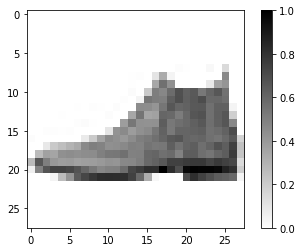

In [20]:
test_image = X[0]

# Plot the image
plt.figure()
plt.imshow(test_image.reshape((28,28)), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

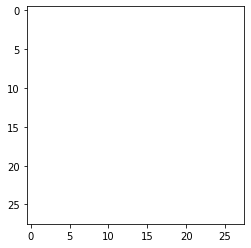

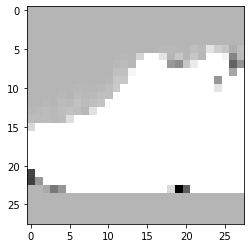

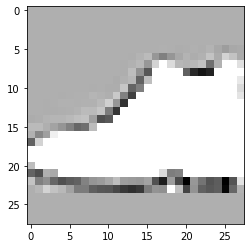

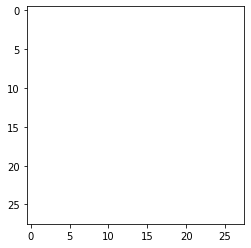

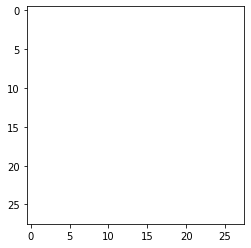

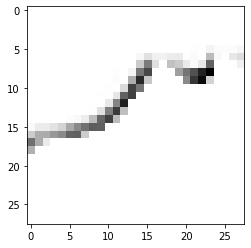

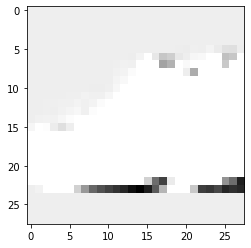

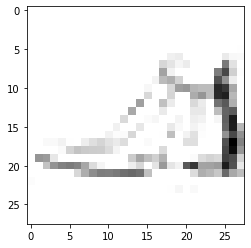

In [21]:
#Output from Convolution Layer 1 after ReLu
from keras.models import Model
import time

XX = model3.input
YY = model3.layers[0].output
new_model = Model(XX, YY)

test_image = test_image.reshape((1,28,28))
ex_image = tf.convert_to_tensor(test_image)
Xresult = new_model.predict(ex_image)


Xresult.reshape(28,28,8)
# Plot the image
plt.figure()
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
for i in range(8):
  plt.imshow(Xresult[:,:,:,i].reshape(28,28), cmap=plt.cm.binary)
  plt.show()

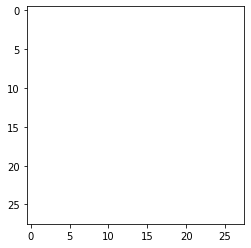

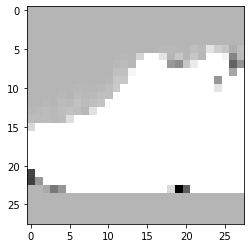

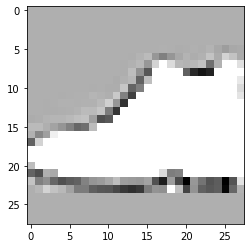

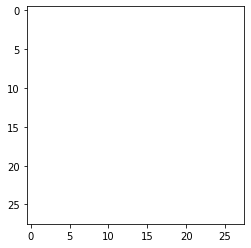

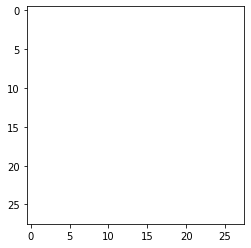

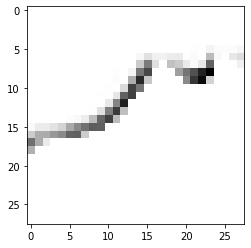

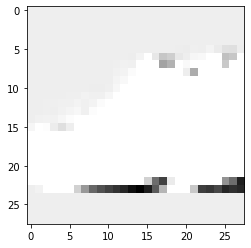

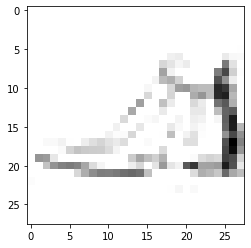

In [22]:
#Output from Convolution Layer 2 after ReLu
from keras.models import Model

XX = model3.input
YY = model3.layers[1].output
new_model = Model(XX, YY)

test_image = test_image.reshape((1,28,28))
ex_image = tf.convert_to_tensor(test_image)
Xresult_2 = new_model.predict(ex_image)

# Plot the image
Xresult_2.reshape(28,28,8)
# Plot the image
plt.figure()
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
for i in range(8):
  plt.imshow(Xresult[:,:,:,i].reshape(28,28), cmap=plt.cm.binary)
  plt.show()